In [1]:
import pickle
import glob
import os

import sys
sys.path.append("../src")  # Ensure src is on the path


# Find all experience pickle files in the parent directory
pickle_files = glob.glob("../experiences_sim_*.pkl")

if not pickle_files:
    raise FileNotFoundError("No experience pickle files found.")

# Select the most recently modified file
experience_path = max(pickle_files, key=os.path.getmtime)

with open(experience_path, "rb") as f:
    all_experiences = pickle.load(f)

print(f"Loaded {len(all_experiences)} games of PPOAgent experiences from {experience_path}.")

Loaded 50 games of PPOAgent experiences from ..\experiences_sim_20250422_162012.pkl.


In [2]:
import numpy as np

all_actions = [] 
for batch in all_experiences: 
    actions = batch[1] # actions is a numpy array 
    all_actions.append(actions)

all_actions_flat = np.concatenate(all_actions) 
average_action = np.mean(all_actions_flat) 
print(f"Average action index taken by the agent: {average_action:.2f}")

Average action index taken by the agent: 49.73


In [3]:
import sys
sys.path.append("../")  # Ensure src is on the path

from src.cards.loader import load_trade_deck_cards

cards = load_trade_deck_cards("../data/cards.csv", filter_sets=["Core Set"], log_cards=False)
# Create list of unique card names
names = [c.name for c in cards]
names = list(dict.fromkeys(names)) + ["Scout","Viper","Explorer"]

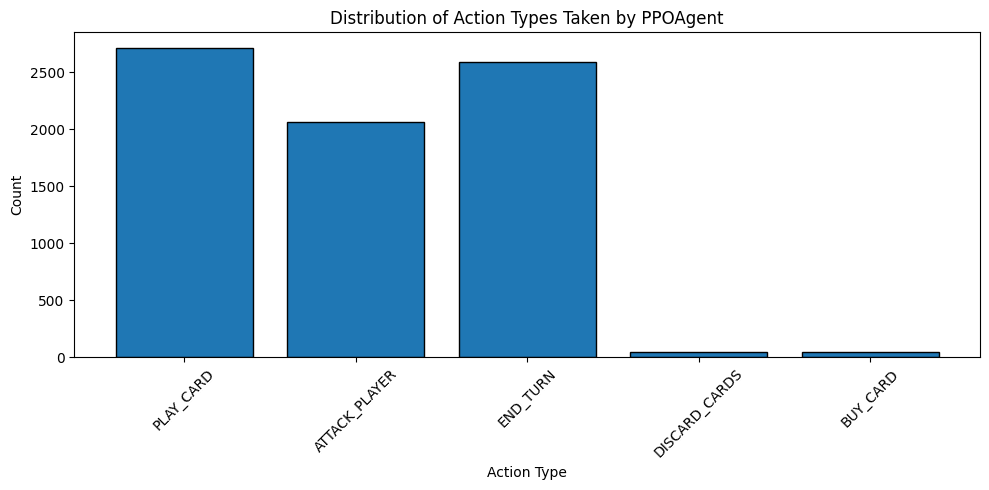

In [ ]:
from src.nn.action_encoder import decode_action
from engine.actions import ActionType
from cards.card import Card

# --- Decode actions ---
decoded_types = []
for action_idx in all_actions_flat:
    # Use decode_action to get the Action object
    try:
        action = decode_action(int(action_idx), names)
        decoded_types.append(action.type.name if hasattr(action, "type") else str(action))
    except Exception as e:
        decoded_types.append("UNKNOWN")

# --- Plot histogram by action type ---
import matplotlib.pyplot as plt
from collections import Counter

type_counts = Counter(decoded_types)
plt.figure(figsize=(10, 5))
plt.bar(type_counts.keys(), type_counts.values(), edgecolor='black')
plt.xlabel("Action Type")
plt.ylabel("Count")
plt.title("Distribution of Action Types Taken by PPOAgent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()